In [ ]:
# preliminary-analysis-2021-foraging.ipynb
#
# Bryan Daniels
#
# Doing some preliminary analysis on foraging data from 2019
# for the social tuning grant proposal.
#

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from toolbox import defaultFigure
defaultFigure.setDefaultParams()
from toolbox.simplePickle import load,save

In [2]:
import seaborn as sns

# load data

In [132]:
resultsdir = '../Data/210811/bees_lifetimetracking_2018data/savedresults/'

In [133]:
# load data calculated per hour
# modified from Data/210811/bees_lifetimetracking_2018data/Data Usage Example.ipynb
df = pd.read_csv('{}daydatamat-v4_alldetections.csv'.format(resultsdir))

In [134]:
df.columns

Index(['Day number', 'Bee unique ID', 'Age', 'Cohort ID', 'Num. observations',
       'Honey', 'Brood care', 'Pollen', 'Dance floor', 'Other', 'Frame 0',
       'Frame 1', 'Frame 2', 'Frame 3', 'Frame 4', 'Frame 5', 'Median speed',
       'Speed circadian coeff.', 'Speed 90th quantile', 'Dispersion (avg)',
       'Exit distance (median)', 'Fraction squares visited',
       'Interactions-sum', 'Interactions-sum unique', 'Interactions-mean',
       'Interactions-mean unique', 'Num. outside trips',
       'Num. dance floor visits', 'Dispersion-minute avg.', 'Tortuosity-mean',
       'Tortuosity-minute avg.'],
      dtype='object')

In [135]:
df['Day number'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85.])

In [121]:
#dfHour['Time (days)'] = dfHour['Day number'] + dfHour['Hour']/24.
#dfMinute['Time (days)'] = dfMinute['Day number'] + dfMinute['timedivision']/(12.*24.)

In [149]:
def printLargestCorrs(corr,thresh):
    """
    Takes pandas correlation dataframe and prints pairs that are above a given threshold
    """
    largeCorrs = np.transpose(np.nonzero(np.array(corr > thresh)))
    for indices in largeCorrs:
        if indices[0] < indices[1]:
            print("{}, {} : {}".format(corr.columns[indices[0]],
                                corr.columns[indices[1]],
                                np.array(corr)[indices[0],indices[1]]))

# exploratory correlation analysis

In [151]:
printLargestCorrs(df.corr(),0.6)

Day number, Bee unique ID : 0.8172158223343056
Day number, Cohort ID : 0.8242953866004308
Bee unique ID, Cohort ID : 0.9934244797451959
Num. observations, Fraction squares visited : 0.6496926722215886
Num. observations, Interactions-sum : 0.8394793310012658
Num. observations, Interactions-sum unique : 0.863931511468426
Num. observations, Interactions-mean unique : 0.6997164642417184
Num. observations, Num. dance floor visits : 0.6034155252100013
Dance floor, Frame 5 : 0.8289940116152863
Frame 0, Exit distance (median) : 0.708837035465689
Median speed, Speed 90th quantile : 0.8272727851159468
Dispersion (avg), Fraction squares visited : 0.6981605637751677
Dispersion (avg), Dispersion-minute avg. : 0.6409344477761962
Fraction squares visited, Interactions-sum unique : 0.6770456641831122
Fraction squares visited, Dispersion-minute avg. : 0.7257154205538664
Interactions-sum, Interactions-sum unique : 0.9122340081565784
Interactions-sum, Interactions-mean : 0.8037523896650847
Interactions-s

# looking for evidence of collective states

### total number of foraging trips

In [171]:
df.columns

Index(['Day number', 'Bee unique ID', 'Age', 'Cohort ID', 'Num. observations',
       'Honey', 'Brood care', 'Pollen', 'Dance floor', 'Other', 'Frame 0',
       'Frame 1', 'Frame 2', 'Frame 3', 'Frame 4', 'Frame 5', 'Median speed',
       'Speed circadian coeff.', 'Speed 90th quantile', 'Dispersion (avg)',
       'Exit distance (median)', 'Fraction squares visited',
       'Interactions-sum', 'Interactions-sum unique', 'Interactions-mean',
       'Interactions-mean unique', 'Num. outside trips',
       'Num. dance floor visits', 'Dispersion-minute avg.', 'Tortuosity-mean',
       'Tortuosity-minute avg.'],
      dtype='object')

<AxesSubplot:xlabel='Day number'>

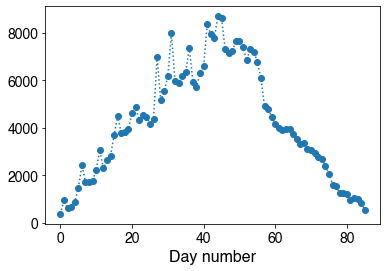

In [217]:
df.groupby('Day number').sum()['Num. outside trips'].plot(marker='o',ls=':')

In [181]:
# keep track of total number of tagged bees each day
nTotal = df.groupby('Day number').nunique()['Bee unique ID']
df = df.set_index('Day number')
df['Total tagged bees'] = nTotal
df = df.reset_index()

Text(0, 0.5, 'Total tagged bees')

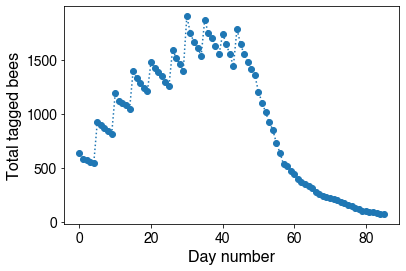

In [186]:
df.groupby('Day number').mean()['Total tagged bees'].plot(marker='o',ls=':')
plt.ylabel('Total tagged bees')

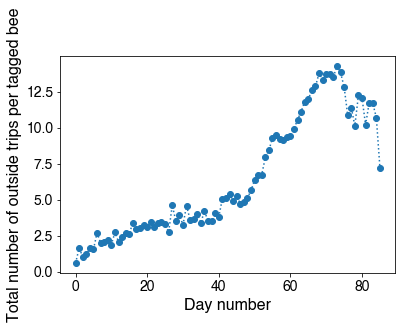

In [188]:
dfDay = df.groupby('Day number')
(dfDay.sum()['Num. outside trips']/dfDay.mean()['Total tagged bees']).plot(marker='o',ls=':')
plt.ylabel('Total number of outside trips per tagged bee');

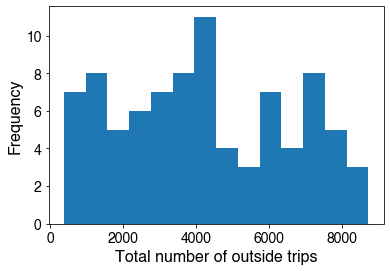

In [148]:
plt.hist(df.groupby('Day number').sum()['Num. outside trips'],bins=14);
plt.xlabel('Total number of outside trips')
plt.ylabel('Frequency');

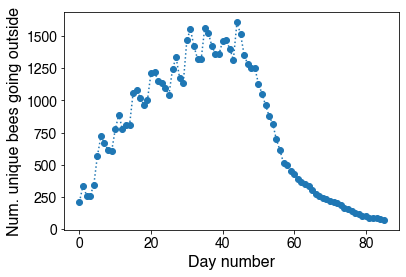

In [170]:
# number of unique bees foraging per day
df[df['Num. outside trips'] > 0].groupby('Day number').nunique()['Bee unique ID'].plot(marker='o',ls=':')
plt.ylabel('Num. unique bees going outside');

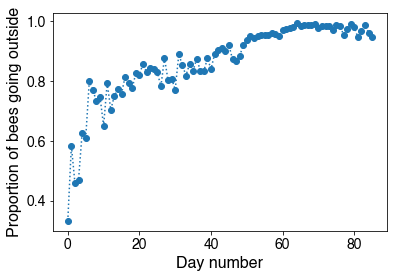

In [189]:
# proportion of bees foraging per day
numOutside = df[df['Num. outside trips'] > 0].groupby('Day number').nunique()['Bee unique ID']
numTotal = df.groupby('Day number').nunique()['Bee unique ID']
(numOutside/numTotal).plot(marker='o',ls=':')
plt.ylabel('Proportion of bees going outside');

In [193]:
firstForageDay = df[df['Num. outside trips']>0].groupby('Bee unique ID').min()['Day number']
df = df.set_index('Bee unique ID')
df['First forage day'] = firstForageDay
df = df.reset_index()

df['Days since first forage'] = df['Day number'] - df['First forage day']

<AxesSubplot:xlabel='Days since first forage'>

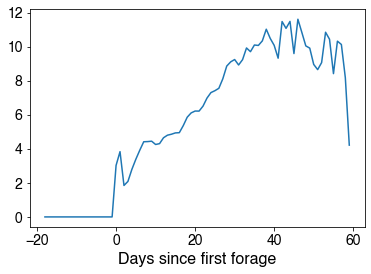

In [201]:
# align by first foraging time
df.groupby('Days since first forage').mean()['Num. outside trips'].plot()

Text(0, 0.5, 'Number of outside trips')

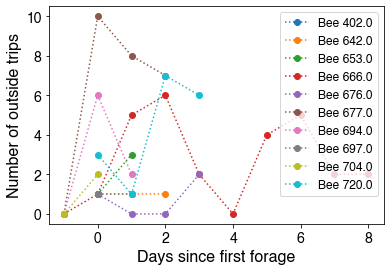

In [210]:
beeIDs = df['Bee unique ID'].unique()[:10]
for beeID in beeIDs:
    dfBee = df[df['Bee unique ID']==beeID]
    plt.plot(dfBee['Days since first forage'],dfBee['Num. outside trips'],'o:',label='Bee {}'.format(beeID))
plt.legend()
plt.xlabel('Days since first forage')
plt.ylabel('Number of outside trips')

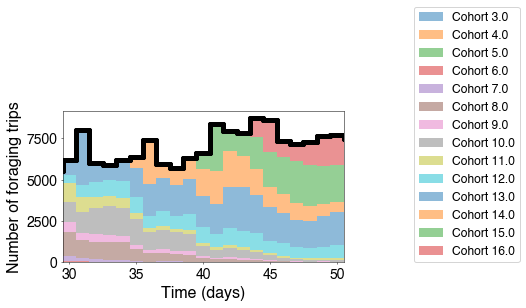

In [281]:
# Michael suggests grouping by cohort...
plt.figure(figsize=(6,3)) #(10,4))
cohortIDs = df['Cohort ID'].unique() #[7:17]
# initialize tripSum for each day to zero
zeros = 0. * df.groupby('Day number').sum()['Num. outside trips']
tripSum = zeros.copy()
for cohortID in cohortIDs:
    dfCohortDayTrips = df[df['Cohort ID']==cohortID].groupby('Day number').sum()['Num. outside trips']
    # fill with zeros on days on which no bees from this cohort were observed
    dfCohortDayTrips = (zeros + dfCohortDayTrips).fillna(0.)
    #dfCohortDay['Num. outside trips'].plot(label='Cohort {}'.format(cohortID))
    plt.bar(dfCohortDayTrips.index,dfCohortDayTrips,
            bottom=tripSum,width=1,alpha=0.5,
            label='Cohort {}'.format(cohortID))
    tripSum += dfCohortDayTrips
plt.step(dfCohortDayTrips.index,tripSum,where='mid',color='k',lw=5)
plt.step(df.groupby('Day number').sum().index,
         df.groupby('Day number').sum()['Num. outside trips'],tripSum,where='mid',color='k',lw=5)
plt.legend(loc=(1.25,0.))
plt.xlabel('Time (days)')
plt.ylabel('Number of foraging trips')
plt.axis(xmin=30-0.5,xmax=50+0.5,ymin=0)
plt.xticks(range(30,52,5));
#plt.yticks(range(0,10000,2000),['${}\\times 10^3$'.format(v) for v in range(0,10,2)])
plt.yticks(range(0,10000,2500))
defaultFigure.makePretty()
plt.subplots_adjust(bottom=0.2,top=0.9,left=0.25,right=0.9)
#plt.yscale('log')
plt.savefig('211109_foraging_trips_vs_day_by_cohort_2018.pdf')

# looking for predictors of foraging

### Age as predictor

<AxesSubplot:ylabel='Frequency'>

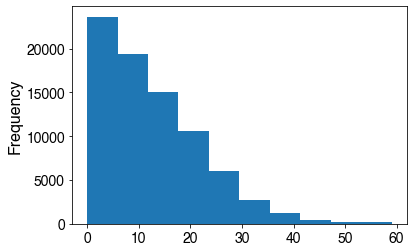

In [157]:
df['Age'].plot.hist()

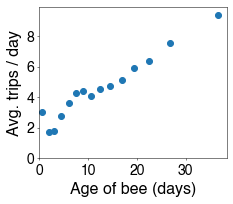

In [282]:
# average time in festoon vs. age

plt.figure(figsize=(4,3))
bins = 15 #[0,5,7,13,15,30] #2 #[0,5,10,30]
#cut = pd.cut(df['Age'],bins) # cut into bins
cut = pd.qcut(df['Age'],bins) # cut into quantiles
dfAgeBinned = df.groupby(cut)
plt.errorbar(dfAgeBinned.mean()['Age'],
             dfAgeBinned.mean()['Num. outside trips'],
             yerr=dfAgeBinned.std()['Num. outside trips']/np.sqrt(dfAgeBinned.count()['Num. outside trips']),
             marker='o',ls='',
            )
plt.xlabel('Age of bee (days)')
plt.ylabel('Avg. trips / day')
plt.axis(xmin=0,ymin=0)
plt.subplots_adjust(left=0.25,right=0.9,bottom=0.2,top=0.9)
defaultFigure.makePretty()
plt.savefig('211109_foraging_vs_age_2018.pdf')

# Old stuff with 2019 data

### Define foragers

In [124]:
# I'll assume for now that any bee not observed in a given 5 minute chunk is foraging for that time
dfMinute['Foraging'] = dfMinute['Num. observations'].isnull().astype(int)

if False:
    # change 'Foraging' value to NaN if more than 1000 bees are missing (seems like data glitch)
    maxForaging = 1000
    dfMinuteSum = dfMinute.groupby('Time (days)').sum()
    badTimes = dfMinuteSum.loc[dfMinuteSum['Foraging'] > maxForaging].index
    for badTime in badTimes:
        dfMinute.loc[(dfMinute['Time (days)'] == badTime,'Foraging')] = np.nan

(4.7, 5.0, -0.05, 1.05)

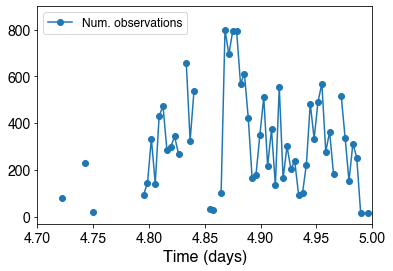

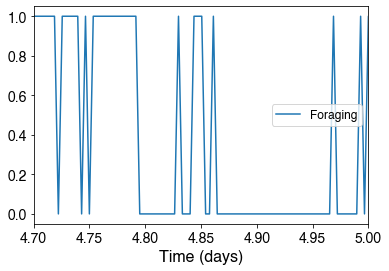

In [40]:
dfMinute.set_index('Bee unique ID').loc[4].plot('Time (days)','Num. observations',marker='o')
plt.axis(xmin=4.7,xmax=5.)
dfMinute.set_index('Bee unique ID').loc[4].plot('Time (days)','Foraging')
plt.axis(xmin=4.7,xmax=5.)

# Number of foragers at a time

In [125]:
foragingTimeSeries = dfMinute.groupby('Time (days)').sum(min_count=1)['Foraging']

(9.0, 11.0, 300.0, 600.0)

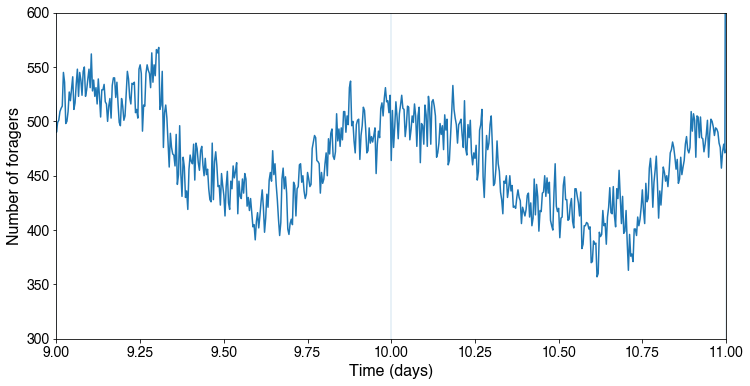

In [130]:
plt.figure(figsize=(12,6))
foragingTimeSeries.plot()
plt.ylabel('Number of foragers')
plt.vlines(np.arange(32),ymin=0,ymax=2000,lw=0.2)
plt.axis(xmin=9,xmax=11,ymin=300,ymax=600)

Text(0.5, 0, 'Number of foragers')

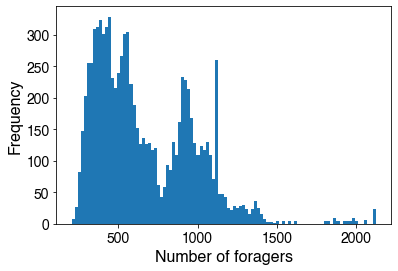

In [127]:
foragingTimeSeries.plot.hist(bins=100)
plt.xlabel('Number of foragers')